Enter index of the data:  4


   parallax  parallax_error  parallax_over_error         f
0  0.171871        0.554753             0.309816  3.227727
1  0.347528        0.408004             0.851778  1.174015
2  2.777340        1.248430             2.224665  0.449506
3  1.305596        1.040140             1.255211  0.796679
4  0.436413        0.245671             1.776415  0.562932
5  0.893974        0.116678             7.661910  0.130516
6  0.358919        0.032282            11.118383  0.089941
7 -0.241496       -0.159440            -1.514658 -0.660215
8  0.509756        0.141692             3.597643  0.277960
9  1.161085        0.702364             1.653110  0.604920
parallax (mas) = 0.436412909
parallax_error (mas) = 0.24567061999999998
f = 0.5629315855733695


C:\Users\USER\AppData\Local\Temp\ipykernel_17336\1554636161.py:59: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  posterior_1_norm = integrate.simps(posterior_1, dist)
C:\Users\USER\AppData\Local\Temp\ipykernel_17336\1554636161.py:65: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  posterior_2_norm = integrate.simps(posterior_2, dist)
C:\Users\USER\AppData\Local\Temp\ipykernel_17336\1554636161.py:72: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  posterior_3_norm = integrate.simps(posterior_3, dist)


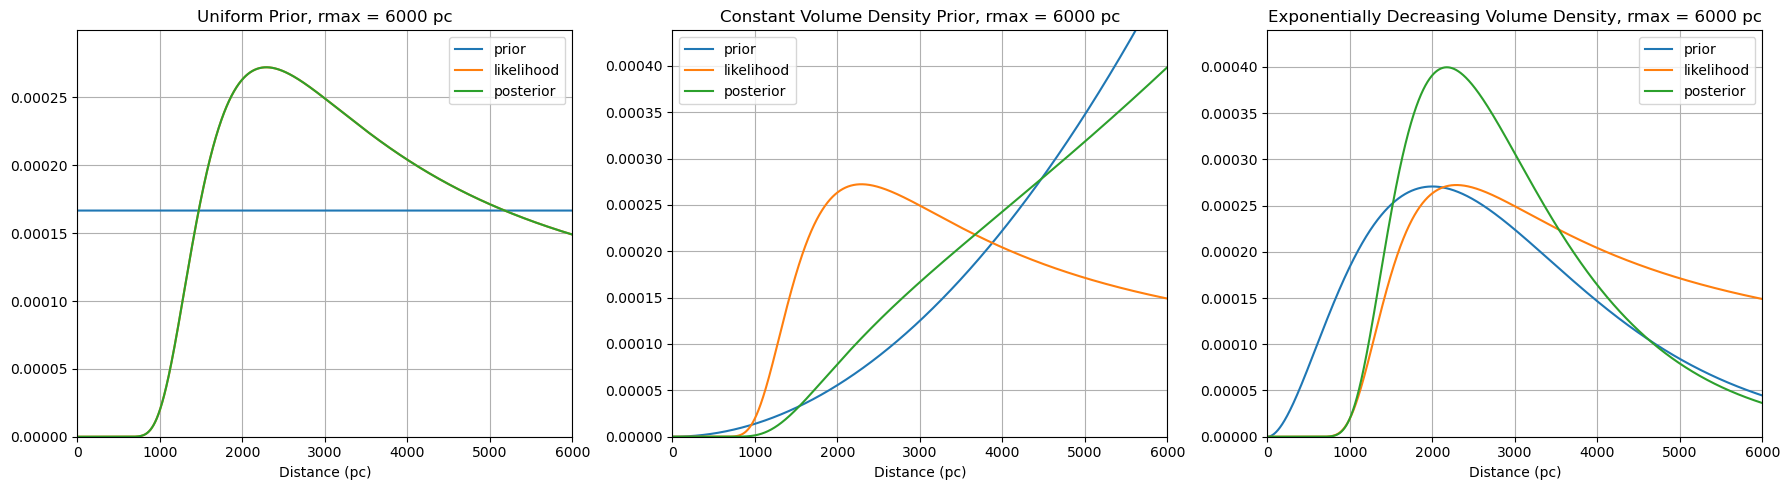

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import pandas as pd
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import rv_continuous
# from astroquery.gaia import Gaia  # Uncomment if needed

# Step 1: Define the prior distributions

# Prior: Constant Volume Density distribution
class ConstantVolumeDensity_gen(rv_continuous):
    def _pdf(self, x):
        return 3 * np.power(x, 2)

# Instantiate the ConstantVolumeDensity prior
ConstantVolumeDensity = ConstantVolumeDensity_gen(a=0.0, name="constant_volume")

# Prior: Exponentially Decreasing Volume Density distribution
class ExponentiallyDecreasingVolumeDensity_gen(rv_continuous):
    def _pdf(self, x):
        return np.exp(-x) * np.power(x, 2) / 2

# Instantiate the ExponentiallyDecreasingVolumeDensity prior
ExponentiallyDecreasingVolumeDensity = ExponentiallyDecreasingVolumeDensity_gen(a=0.0, name="exponentially_decreasing")

# Step 2: Read the data from a CSV file
df = pd.read_csv("gaia_parallax.csv")

# Step 3: Get initial data values based on the input index
index = int(input("Enter index of the data: "))
parallax = df["parallax"][index] / 1000  # Convert parallax to arcseconds
parallax_error = df["parallax_error"][index] / 1000  # Convert error to arcseconds
parallax_over_error = df["parallax_over_error"]
df["f"] = 1 / parallax_over_error
f = df["f"][index]

# Print the relevant data for the selected index
print(df[["parallax", "parallax_error", "parallax_over_error", "f"]])

# Step 4: Define distance range for integration (rmax and dist)
rmax = 6000
dist = np.linspace(1, rmax, 10000)

# Step 5: Define the likelihood function based on the Gaussian distribution
likelihood = norm.pdf(x=1/dist, scale=parallax_error, loc=parallax)

# Normalize the likelihood over the distance range
normalisasi, _ = integrate.quad(lambda t: norm.pdf(x=1/t, scale=parallax_error, loc=parallax), a=0, b=rmax)
likelihood /= normalisasi

# Step 6: Define and calculate the posterior distributions for different priors

# Prior 1: Uniform distribution
prior_1 = uniform.pdf(x=dist, scale=rmax)
posterior_1 = prior_1 * likelihood
posterior_1_norm = integrate.simps(posterior_1, dist)
posterior_1 /= posterior_1_norm

# Prior 2: Constant Volume Density
prior_2 = ConstantVolumeDensity.pdf(x=dist, scale=rmax)
posterior_2 = prior_2 * likelihood
posterior_2_norm = integrate.simps(posterior_2, dist)
posterior_2 /= posterior_2_norm

# Prior 3: Exponentially Decreasing Volume Density
rlen = 1000
prior_3 = ExponentiallyDecreasingVolumeDensity.pdf(x=dist, scale=rlen)
posterior_3 = prior_3 * likelihood
posterior_3_norm = integrate.simps(posterior_3, dist)
posterior_3 /= posterior_3_norm

# Step 7: Output the values for parallax and f
print(f"parallax (mas) = {parallax*1000}")
print(f"parallax_error (mas) = {parallax_error*1000}")
print(f"f = {f}")

# Step 8: Create plots for the priors, likelihood, and posteriors

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Uniform prior
ax1.plot(dist, prior_1, label="prior")
ax1.plot(dist, likelihood, label="likelihood")
ax1.plot(dist, posterior_1, label="posterior")
ax1.legend()
ax1.grid(True)
ax1.set_xlim(0, rmax)
ax1.set_ylim(0, max(posterior_1)*1.1)
ax1.set_xlabel("Distance (pc)")
ax1.set_title(f"Uniform Prior, rmax = {int(rmax)} pc")

# Plot 2: Constant Volume Density prior
ax2.plot(dist, prior_2, label="prior")
ax2.plot(dist, likelihood, label="likelihood")
ax2.plot(dist, posterior_2, label="posterior")
ax2.legend(loc="best")
ax2.grid(True)
ax2.set_xlim(0, rmax)
ax2.set_ylim(0, max(posterior_2)*1.1)
ax2.set_xlabel("Distance (pc)")
ax2.set_title(f"Constant Volume Density Prior, rmax = {int(rmax)} pc")

# Plot 3: Exponentially Decreasing Volume Density prior
ax3.plot(dist, prior_3, label="prior")
ax3.plot(dist, likelihood, label="likelihood")
ax3.plot(dist, posterior_3, label="posterior")
ax3.legend(loc="best")
ax3.grid(True)
ax3.set_xlim(0, rmax)
ax3.set_ylim(0, max(posterior_3)*1.1)
ax3.set_xlabel("Distance (pc)")
ax3.set_title(f"Exponentially Decreasing Volume Density, rmax = {int(rmax)} pc")

# Show the plots
plt.tight_layout()
plt.show()